In [6]:
# General import
import numpy as np
import rasterio
import pandas as pd
import geopandas as gpd
import netCDF4 as nc
import xarray as xr
import scipy
import pickle as pkl

import warnings

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
from cartopy.feature import ShapelyFeature

##### NY lat lon data:
min lat: 40.4772

max lat: 45.0153

min lon: -79.7624

max lon: -71.7517

In [9]:
def create_figure2001(file):
    fp = rasterio.open(file)
    dem = fp.read(1)
    fig = plt.figure(figsize=(10,10))
    dem = np.ma.masked_where(dem >100, dem) #remove no data readings
    dem1 = np.ma.masked_where(dem == 0, dem)
    plt.imshow(dem1,cmap=plt.get_cmap('Greens'))
    cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.title('treecanopy 2001',fontsize=15)
    fp.close()
    plt.show()

In [10]:
%%bash 
gdalwarp -overwrite -t_srs EPSG:4269 /home/jovyan/work/ESDA_lg/trynewone/2001tree/nlcd2001_canopy_ny.tif /home/jovyan/work/ESDA_lg/trynewone/2001tree/2001tree.tif
#change the project system from NAD83/Conus Albers to NAD1983

Copying color table from /home/jovyan/work/ESDA_lg/trynewone/2001tree/nlcd2001_canopy_ny.tif to new file.
Creating output file that is 30141P x 18242L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2001tree/nlcd2001_canopy_ny.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


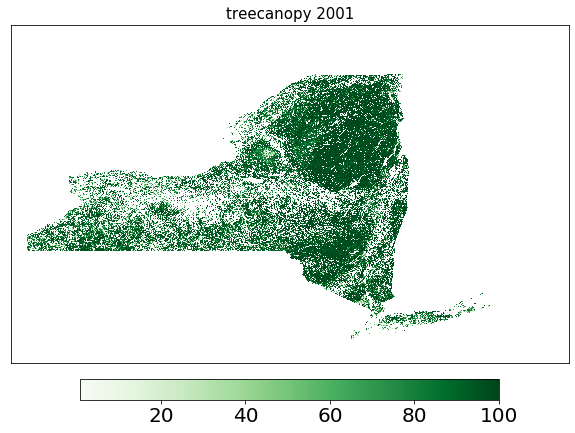

In [13]:
tree2001 = '/home/jovyan/work/ESDA_lg/trynewone/2001tree/2001tree.tif'
create_figure2001(tree2001)

In [14]:
save_dict = {'tree2001': tree2001}
with open('FinalProject.pkl', 'wb') as fp:
    pkl.dump(save_dict, fp, protocol=pkl.HIGHEST_PROTOCOL)

In [18]:
def create_figure2011(file):
    fp = rasterio.open(file)
    dem = fp.read(1)
    fig = plt.figure(figsize=(10,10))
    dem = np.ma.masked_where(dem >100, dem) #remove no data readings
    dem1 = np.ma.masked_where(dem == 0, dem)
    plt.imshow(dem1,cmap=plt.get_cmap('Greens'))
    cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.title('treecanopy 2011',fontsize=15)
    fp.close()
    plt.show()

In [16]:
%%bash 
gdalwarp -overwrite -t_srs EPSG:4269 /home/jovyan/work/ESDA_lg/trynewone/2011tree/nlcd2011_canopy_cartographic_ny.tif /home/jovyan/work/ESDA_lg/trynewone/2011tree/2011tree.tif
#change the project system from NAD83/Conus Albers to NAD1983

Copying color table from /home/jovyan/work/ESDA_lg/trynewone/2011tree/nlcd2011_canopy_cartographic_ny.tif to new file.
Creating output file that is 30141P x 18242L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2011tree/nlcd2011_canopy_cartographic_ny.tif [1/1] : 0Using internal nodata values (e.g. 255) for image /home/jovyan/work/ESDA_lg/trynewone/2011tree/nlcd2011_canopy_cartographic_ny.tif.
Copying nodata values from source /home/jovyan/work/ESDA_lg/trynewone/2011tree/nlcd2011_canopy_cartographic_ny.tif to destination /home/jovyan/work/ESDA_lg/trynewone/2011tree/2011tree.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


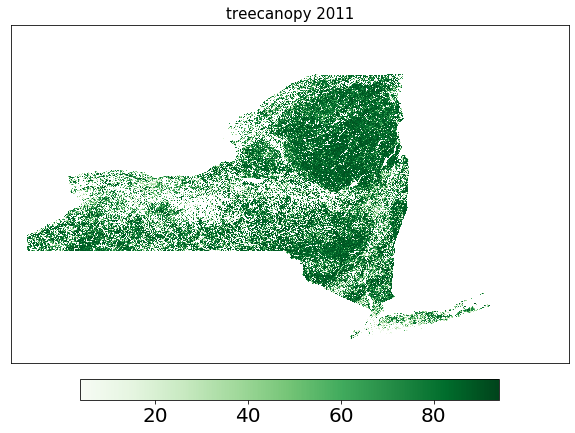

In [18]:
tree2011 = '/home/jovyan/work/ESDA_lg/trynewone/2011tree/2011tree.tif'
create_figure2011(tree2011)

In [19]:
save_dict = {'tree2011': tree2011}
with open('FinalProject.pkl', 'wb') as fp:
    pkl.dump(save_dict, fp, protocol=pkl.HIGHEST_PROTOCOL)

In [20]:
%%bash
#gdal_calc.py -A /home/jovyan/work/ESDA_lg/trynewone/2011tree/2011tree.tif -B /home/jovyan/work/ESDA_lg/trynewone/2001tree/2001tree.tif --outfile /home/jovyan/work/ESDA_lg/trynewone/2011tree/diff.tif --calc="A-B"

In [24]:
def difference(file1,file2):
    fp1 = rasterio.open(file1)
    dem1 = fp1.read(1)
    fp2 = rasterio.open(file2)
    dem2 = fp2.read(1)
    
    fig = plt.figure(figsize=(10,10))
    dem1 =np.ma.masked_where(dem1 > 100, dem1)
    dem2 =np.ma.masked_where(dem2 > 100, dem2)
    dem = dem1 - dem2
    dem = np.ma.masked_where(dem > 100, dem)
    dem = np.ma.masked_where(dem == 0, dem) #remove no data/no change readings
    plt.imshow(dem,cmap=plt.get_cmap('coolwarm'))
    plt.xticks([])
    plt.yticks([])
    plt.title('treeloss 2001-2011',fontsize=15)
    fp1.close()
    fp2.close()
    plt.show()

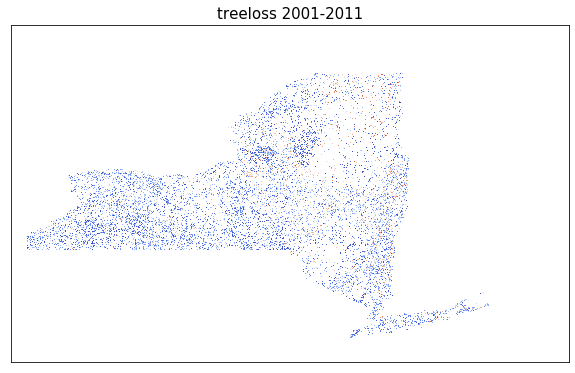

In [25]:
difference(tree2011,tree2001)
#???? why only positive values???

In [103]:
%%bash
gdalinfo /home/jovyan/work/ESDA_lg/trynewone/2011tree/diff.tif

Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/ESDA_lg/trynewone/2011tree/diff.tif
Size is 30141, 18242
Coordinate System is:
GEOGCS["NAD83",
    DATUM["North_American_Datum_1983",
        SPHEROID["GRS 1980",6378137,298.2572221010042,
            AUTHORITY["EPSG","7019"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6269"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4269"]]
Origin = (-80.035689117385033,45.847800577039841)
Pixel Size = (0.000315826199390,-0.000315826199390)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -80.0356891,  45.8478006) ( 80d 2' 8.48"W, 45d50'52.08"N)
Lower Left  ( -80.0356891,  40.0864990) ( 80d 2' 8.48"W, 40d 5'11.40"N)
Upper Right ( -70.5163716,  45.8478006) ( 70d30'58.94"W, 45d50'52.08"N)
Lower Right ( -70.5163716,  40.0864990) ( 70d30'58.94"W, 40d 5'11.40"N)
Center      ( -75.2760304,  42.9671498) ( 75d16'33.71"W, 42d58' 1.74"N)
Band 

pj_obj_create: Open of /opt/conda/share/proj failed


##### 2. possible factors that may affect the forest cover(population, precipitation and temperature)

#####  2.1 population

In [125]:
#2000 NewYork Pop data by county
pop1 = gpd.read_file('/home/jovyan/work/ESDA_lg/trynewone/NYcounty2000/cty036.shp')
#pop1

In [126]:
%%bash
# Rasterize the boundary .shp file
gdal_rasterize -l cty036 -a POP2000 -te -80 40 -71 46 -tr 0.01 0.01 \
/home/jovyan/work/ESDA_lg/trynewone/NYcounty2000/cty036.shp /home/jovyan/work/ESDA_lg/trynewone/NYcounty2000/county.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [127]:
pop2000 = rasterio.open('/home/jovyan/work/ESDA_lg/trynewone/NYcounty2000/county.tif').read(1)
print(pop2000.shape)

(600, 900)


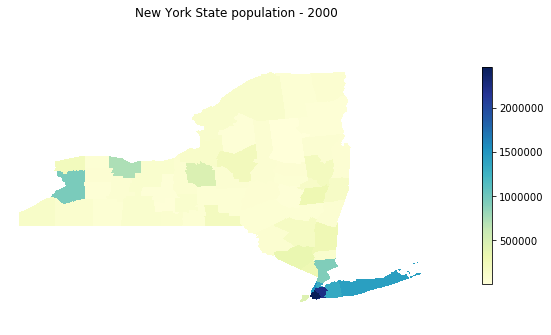

In [128]:
fig = plt.figure(figsize=(10, 8))
mask = np.ma.masked_where(pop2000 == 0, pop2000)
cmap = plt.cm.YlGnBu
plt.axis('off')
plt.imshow(mask, interpolation='none', cmap=cmap)
cb = plt.colorbar(orientation='vertical',shrink=0.5,pad=0.03)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York State population - 2000')
plt.show()

In [129]:
#2010 NewYork Pop data by county
pop2 = gpd.read_file('/home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/NY2010.shp')
#pop2

In [130]:
%%bash
# Rasterize the boundary .shp file
gdal_rasterize -l NY2010 -a POP2010 -te -80 40 -71 46 -tr 0.01 0.01 \
/home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/NY2010.shp /home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/county.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [131]:
pop2010 = rasterio.open('/home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/county.tif').read(1)
print(pop2010.shape)

(600, 900)


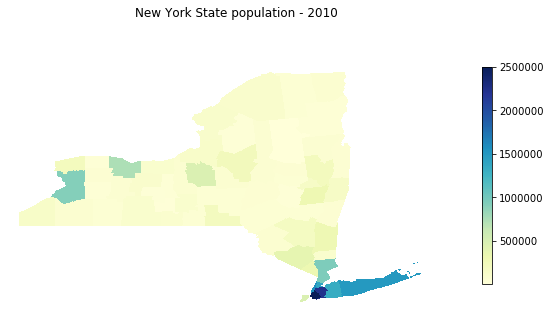

In [132]:
fig = plt.figure(figsize=(10, 8))
mask1 = np.ma.masked_where(pop2010 == 0, pop2010)
cmap = plt.cm.YlGnBu
plt.axis('off')
plt.imshow(mask1, interpolation='none', cmap=cmap)
cb = plt.colorbar(orientation='vertical',shrink=0.5,pad=0.03)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York State population - 2010')
plt.show()

In [133]:
%%bash
# Rasterize the boundary .shp file
gdal_rasterize -l NY2010 -a DIFF -te -80 40 -71 46 -tr 0.01 0.01 \
/home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/NY2010.shp /home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/difference.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:
popdiff = rasterio.open('/home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/difference.tif').read(1)
print(popdiff.shape)

(600, 900)


In [110]:
%%bash
gdalinfo /home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/difference.tif

Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/ESDA_lg/trynewone/NYcounty2010/difference.tif
Size is 900, 600
Coordinate System is:
GEOGCS["NAD83",
    DATUM["North_American_Datum_1983",
        SPHEROID["GRS 1980",6378137,298.2572221010042,
            AUTHORITY["EPSG","7019"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6269"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4269"]]
Origin = (-80.000000000000000,46.000000000000000)
Pixel Size = (0.010000000000000,-0.010000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -80.0000000,  46.0000000) ( 80d 0' 0.00"W, 46d 0' 0.00"N)
Lower Left  ( -80.0000000,  40.0000000) ( 80d 0' 0.00"W, 40d 0' 0.00"N)
Upper Right ( -71.0000000,  46.0000000) ( 71d 0' 0.00"W, 46d 0' 0.00"N)
Lower Right ( -71.0000000,  40.0000000) ( 71d 0' 0.00"W, 40d 0' 0.00"N)
Center      ( -75.5000000,  43.0000000) ( 75d30' 0.00"W, 43d 0' 0.00"N)

pj_obj_create: Open of /opt/conda/share/proj failed


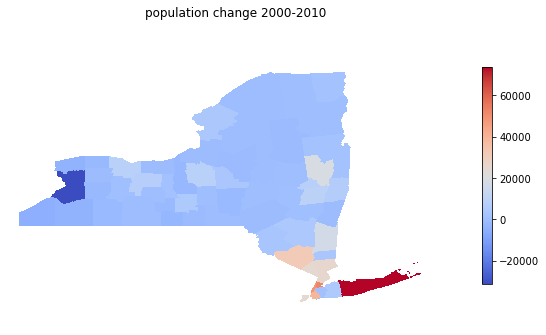

In [111]:
fig = plt.figure(figsize=(10, 8))
mask2 = np.ma.masked_where(popdiff == 0, popdiff)
plt.imshow(mask2, interpolation='none', cmap=cm.coolwarm)
plt.axis('off')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('population change 2000-2010')
cb = plt.colorbar(orientation='vertical',shrink=0.5,pad=0.03)
plt.show()

#####  2.2 temperature

In [63]:
%%bash
gdalwarp -of NetCDF /home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil /home/jovyan/work/ESDA_lg/trynewone/2001temp/2001temp.nc

Creating output file that is 1405P x 621L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil.
Copying nodata values from source /home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil to destination /home/jovyan/work/ESDA_lg/trynewone/2001temp/2001temp.nc.
...10...20...30...40...50...60...70...80...90...100 - done.


In [70]:
# Read dataset
tp01= '/home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil'
prism_cols = 1405
prism_rows = 621
prism_nodata = -9999

temp2001 = np.fromfile(tp01, dtype=np.float32)
temp2001 = temp2001.reshape(prism_rows, prism_cols)
temp2001[temp2001 == prism_nodata] = np.nan

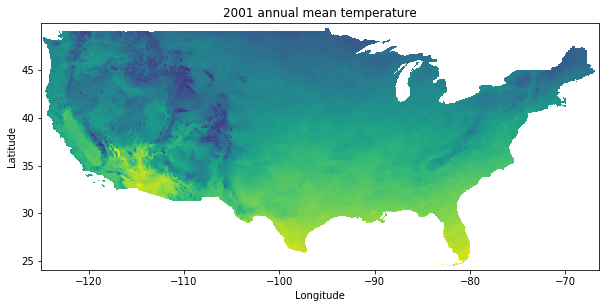

In [71]:
img_extent = [-125.0208333, -66.4791667, 24.0625, 49.9375] 
fig = plt.figure(figsize=(10, 10))
plt.imshow(temp2001, extent=(img_extent))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2001 annual mean temperature')
plt.show()

In [72]:
%%bash
gdalwarp -of NetCDF /home/jovyan/work/ESDA_lg/trynewone/2011temp/PRISM_tmean_stable_4kmM3_2011_bil.bil /home/jovyan/work/ESDA_lg/trynewone/2011temp/2011temp.nc

Creating output file that is 1405P x 621L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2011temp/PRISM_tmean_stable_4kmM3_2011_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /home/jovyan/work/ESDA_lg/trynewone/2011temp/PRISM_tmean_stable_4kmM3_2011_bil.bil.
Copying nodata values from source /home/jovyan/work/ESDA_lg/trynewone/2011temp/PRISM_tmean_stable_4kmM3_2011_bil.bil to destination /home/jovyan/work/ESDA_lg/trynewone/2011temp/2011temp.nc.
...10...20...30...40...50...60...70...80...90...100 - done.


In [73]:
# Read dataset
tp11= '/home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil'
prism_cols = 1405
prism_rows = 621
prism_nodata = -9999

temp2011 = np.fromfile(tp11, dtype=np.float32)
temp2011 = temp2011.reshape(prism_rows, prism_cols)
temp2011[temp2011 == prism_nodata] = np.nan

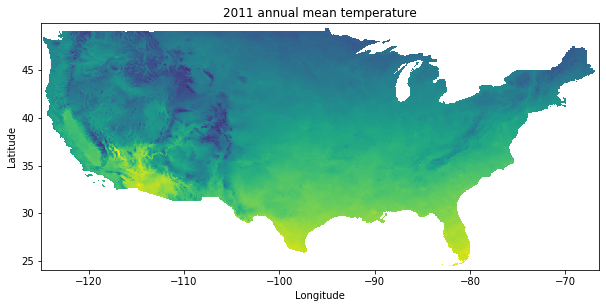

In [74]:
img_extent = [-125.0208333, -66.4791667, 24.0625, 49.9375] 
fig = plt.figure(figsize=(10, 10))
plt.imshow(temp2011, extent=(img_extent))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2011 annual mean temperature')
plt.show()

In [97]:
%%bash
gdal_calc.py --outfile=/home/jovyan/work/ESDA_lg/trynewone/2001temp/test.tif -A /home/jovyan/work/ESDA_lg/trynewone/2011temp/PRISM_tmean_stable_4kmM3_2011_bil.bil -B /home/jovyan/work/ESDA_lg/trynewone/2001temp/PRISM_tmean_stable_4kmM3_2001_bil.bil --calc="A-B"

0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 14.. 14.. 14.. 14.. 14.. 14.. 14.. 15.. 15.. 15.. 15.. 15.. 15.. 16.. 16.. 16.. 16.. 16.. 16.. 17.. 17.. 17.. 17.. 17.. 17.. 18.. 18.. 18.. 18.. 18.. 18.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 20.. 20.. 20.. 20.. 20.. 20.. 21.. 21.. 21.. 21.. 21.. 21.. 22.. 22.. 22.. 22.. 22.. 22.. 23.. 23.. 23.. 23.. 23.. 23.. 23.. 24.. 24.. 24.. 24.. 24.. 24.. 25.. 25.. 25.. 25.. 25.. 25.. 26.. 26.. 26.. 26.. 26.. 26.. 27.. 27.. 27.. 27.. 27.. 27.. 28.. 28.. 28.. 28.. 28.. 28.. 28.. 29.. 29.. 29.. 29.. 29.. 29.. 30.. 30.. 30.. 30.. 30.. 30.. 31.. 31.. 31.. 31.. 31.. 31.. 32.. 32.. 32.. 32.. 32.. 32.. 33.. 33.. 33.. 33.. 33.. 33.. 33.. 34.

In [29]:
%%bash
gdalinfo /home/jovyan/work/ESDA_lg/trynewone/2001temp/test.tif

Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/ESDA_lg/trynewone/2001temp/test.tif
Size is 1405, 621
Coordinate System is:
GEOGCS["NAD83",
    DATUM["North_American_Datum_1983",
        SPHEROID["GRS 1980",6378137,298.2572221010042,
            AUTHORITY["EPSG","7019"]],
        AUTHORITY["EPSG","6269"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4269"]]
Origin = (-125.020833333333499,49.937499999999503)
Pixel Size = (0.041666666667000,-0.041666666667000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-125.0208333,  49.9375000) (125d 1'15.00"W, 49d56'15.00"N)
Lower Left  (-125.0208333,  24.0625000) (125d 1'15.00"W, 24d 3'45.00"N)
Upper Right ( -66.4791667,  49.9375000) ( 66d28'45.00"W, 49d56'15.00"N)
Lower Right ( -66.4791667,  24.0625000) ( 66d28'45.00"W, 24d 3'45.00"N)
Center      ( -95.7500000,  37.0000000) ( 95d45' 0.00"W, 37d 0' 0.00"N)
Band 1 Block=1405x1 Type=Float32, Color

pj_obj_create: Open of /opt/conda/share/proj failed


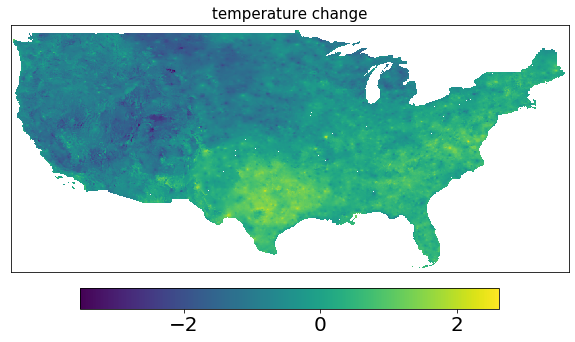

In [30]:
fp = rasterio.open(tempdiff)
dem = fp.read(1)
fig = plt.figure(figsize=(10,10))
dem = np.ma.masked_where(dem >100, dem) #remove no data readings
dem1 = np.ma.masked_where(dem == 0, dem)
plt.imshow(dem1)
cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.xticks([])
plt.yticks([])
plt.title('temperature change',fontsize=15)
fp.close()
plt.show()

#####  2.3 precipitation

In [87]:
%%bash
gdalwarp -of NetCDF /home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil /home/jovyan/work/ESDA_lg/trynewone/2001precip/2001precip.nc

Creating output file that is 1405P x 621L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil.
Copying nodata values from source /home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil to destination /home/jovyan/work/ESDA_lg/trynewone/2001precip/2001precip.nc.
...10...20...30...40...50...60...70...80...90...100 - done.


In [88]:
# Read dataset
pp01= '/home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil'
prism_cols = 1405
prism_rows = 621
prism_nodata = -9999

precp2001 = np.fromfile(pp01, dtype=np.float32)
precp2001= precp2001.reshape(prism_rows, prism_cols)
precp2001[precp2001 == prism_nodata] = np.nan

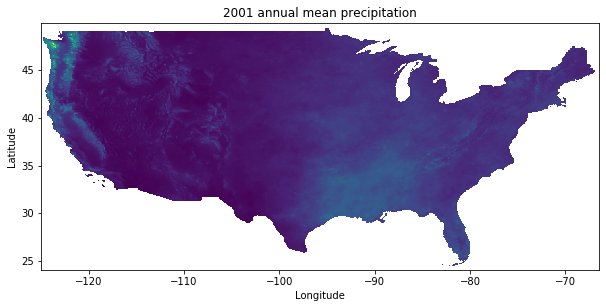

In [90]:
img_extent = [-125.0208333, -66.4791667, 24.0625, 49.9375] 
fig = plt.figure(figsize=(10, 10))
plt.imshow(precp2001, extent=(img_extent))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2001 annual mean precipitation')
plt.show()

In [91]:
%%bash
gdalwarp -of NetCDF /home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil /home/jovyan/work/ESDA_lg/trynewone/2011precip/2011precip.nc

Creating output file that is 1405P x 621L.
Processing /home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil.
Copying nodata values from source /home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil to destination /home/jovyan/work/ESDA_lg/trynewone/2011precip/2011precip.nc.
...10...20...30...40...50...60...70...80...90...100 - done.


In [95]:
# Read dataset
pp11= '/home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil'
prism_cols = 1405
prism_rows = 621
prism_nodata = -9999

precp2011 = np.fromfile(pp11, dtype=np.float32)
precp2011= precp2011.reshape(prism_rows, prism_cols)
precp2011[precp2011 == prism_nodata] = np.nan

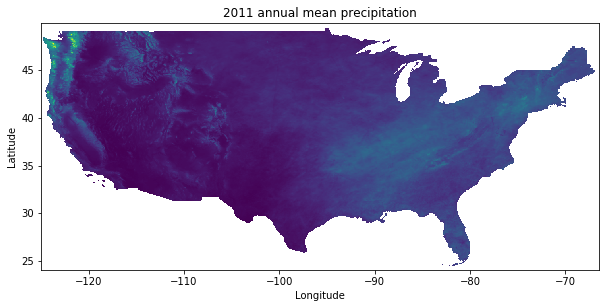

In [96]:
img_extent = [-125.0208333, -66.4791667, 24.0625, 49.9375] 
fig = plt.figure(figsize=(10, 10))
plt.imshow(precp2011, extent=(img_extent))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2011 annual mean precipitation')
plt.show()

In [100]:
%%bash
gdal_calc.py --outfile=/home/jovyan/work/ESDA_lg/trynewone/2001precip/test.tif -A /home/jovyan/work/ESDA_lg/trynewone/2011precip/PRISM_ppt_stable_4kmM3_2011_bil.bil -B /home/jovyan/work/ESDA_lg/trynewone/2001precip/PRISM_ppt_stable_4kmM3_2001_bil.bil --calc="A-B"

0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 5.. 5.. 5.. 5.. 5.. 5.. 6.. 6.. 6.. 6.. 6.. 6.. 7.. 7.. 7.. 7.. 7.. 7.. 8.. 8.. 8.. 8.. 8.. 8.. 9.. 9.. 9.. 9.. 9.. 9.. 9.. 10.. 10.. 10.. 10.. 10.. 10.. 11.. 11.. 11.. 11.. 11.. 11.. 12.. 12.. 12.. 12.. 12.. 12.. 13.. 13.. 13.. 13.. 13.. 13.. 14.. 14.. 14.. 14.. 14.. 14.. 14.. 15.. 15.. 15.. 15.. 15.. 15.. 16.. 16.. 16.. 16.. 16.. 16.. 17.. 17.. 17.. 17.. 17.. 17.. 18.. 18.. 18.. 18.. 18.. 18.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 20.. 20.. 20.. 20.. 20.. 20.. 21.. 21.. 21.. 21.. 21.. 21.. 22.. 22.. 22.. 22.. 22.. 22.. 23.. 23.. 23.. 23.. 23.. 23.. 23.. 24.. 24.. 24.. 24.. 24.. 24.. 25.. 25.. 25.. 25.. 25.. 25.. 26.. 26.. 26.. 26.. 26.. 26.. 27.. 27.. 27.. 27.. 27.. 27.. 28.. 28.. 28.. 28.. 28.. 28.. 28.. 29.. 29.. 29.. 29.. 29.. 29.. 30.. 30.. 30.. 30.. 30.. 30.. 31.. 31.. 31.. 31.. 31.. 31.. 32.. 32.. 32.. 32.. 32.. 32.. 33.. 33.. 33.. 33.. 33.. 33.. 33.. 34.

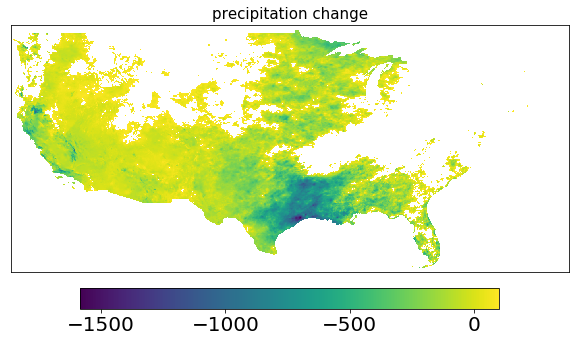

In [26]:
fp = rasterio.open(precipdiff)
dem = fp.read(1)
fig = plt.figure(figsize=(10,10))
dem = np.ma.masked_where(dem >100, dem)
plt.imshow(dem)
cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.xticks([])
plt.yticks([])
plt.title('precipitation change',fontsize=15)
fp.close()
plt.show()